In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import matplotlib

Using TensorFlow backend.


Initialized TensorFlow


In [24]:
def get_A(scale = 1.0, epochs = 15, N = [100, 100, 100], take_layer = 1):
    # scaling the architecture up/down
    N = [int(t * scale) for t in N]

    def get_p_arr(p):
        """ p array with failure on the first layer """
        return [0, p]  + [0] * len(N)

    # Lips. coeff
    KLips = 1.

    # activation function
    activation = 'sigmoid'

    # training the network
    exp = MNISTExperiment(N = N, p_inference = get_p_arr(0), p_train = get_p_arr(0), KLips = KLips, epochs = epochs,
                                      activation = activation, reg_type = None, reg_coeff = 0, do_print = 'plot',
                                      name = 'experiment_weights', seed = None, batch_size = 100)
    
    # using outputs of a hidden layer
    model_partial = Model(inputs = exp.model_correct.inputs, outputs = exp.model_correct.layers[take_layer].output)
    # using a fixed input
    res = model_partial.predict(exp.x_train[0:1])
    
    # returning the activations in the middle
    return res

In [33]:
# all scales of the network (up and down)
scales = np.linspace(0.5, 5, 5)

# repetitions for each scale
repetitions = 10

print('Total runs: %d' % (len(scales) * repetitions))

Total runs: 50


In [34]:
def process_scale(s, **kwargs):
    """ Run many repetitions for one scale """
    return [get_A(scale = s, **kwargs) for _ in range(repetitions)]

def process_all(**kwargs):
    """ Random variable with all results """
    return {scale: process_scale(scale, **kwargs) for scale in tqdm(scales)}

In [35]:
# obtaining the results (no training)
results = process_all(epochs = 0)


100%|██████████| 5/5 [06:50<00:00, 88.97s/it]

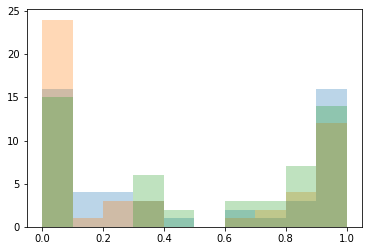

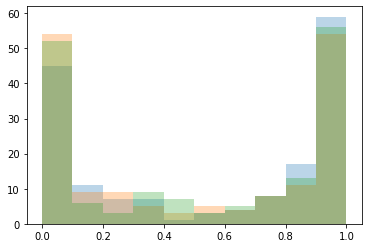

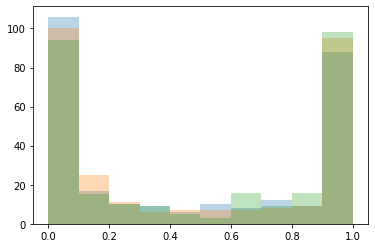

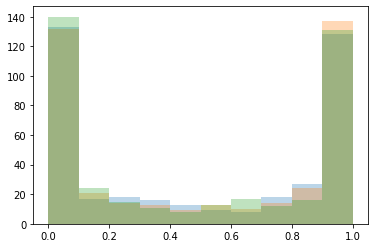

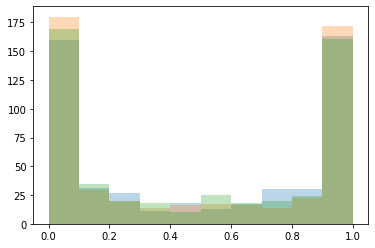

In [32]:
# untrained
for scale in scales:
    plt.figure()
    for i in range(repetitions):
        plt.hist(results[scale][i].flatten(), alpha = 0.3)
    plt.show()

Activations are ~ same

In [ ]:
# obtaining the results (no training)
results = process_all(epochs = 20)

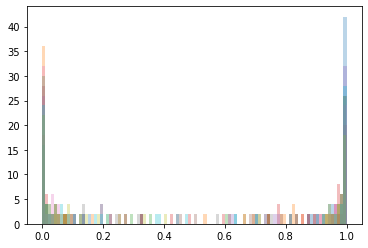

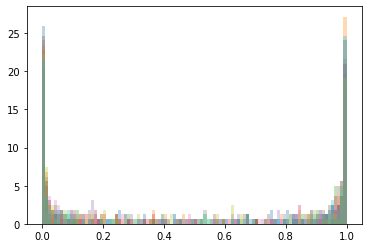

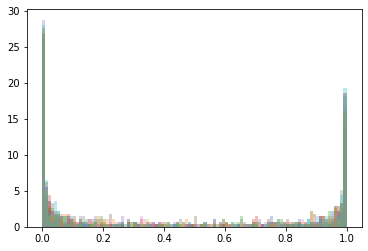

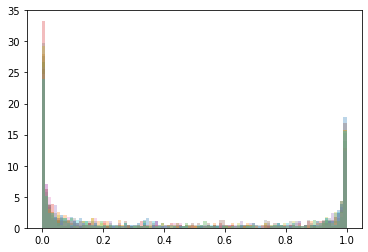

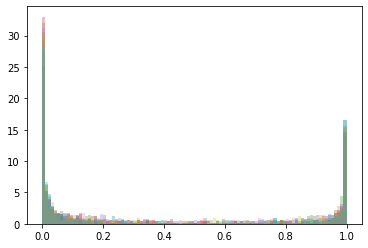

In [38]:
# trained 20 epochs
for scale in scales:
    plt.figure()
    for i in range(repetitions):
        plt.hist(results[scale][i].flatten(), alpha = 0.3, bins = 100, density = True)
    plt.show()

The distribution seems to stabilize